# Can Machine Learning be applied to Badminton?

Badminton is my favourite sport and I enjoy playing it. Over the course of time since I started exploring Data Science I have been searching for the domains where I can apply Machine Learning and get some insights from the data. I got this idea of collecting my own game data and see if I can analyze and get some insights from it. So I started collecting the game data. The data consists of the number of errors I made(errors like smash errors,Net errors,service errors,Away errors),hyderation status,diet I had before the match etc.Also given these features whether I won the game or not

The data very much fits into a supervised classification problem. We can apply various classification algorithms like logistic regression,decision trees,random forests and get insights of the features affecting the outcome of the game and also be able to predict the chances of winning a game given the features. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
bd = pd.read_excel('/Users/yaswanthseela/Desktop/Projects/Badminton Analytics/badminton_data.xlsx')

In [4]:
bd

,Service Errors,Net Errors,Away,Smash Errors,Water Drank in litres,Meditated,Diet,Match Result
0,4,4,10,6,1.2,No,Light,Lost
1,5,4,9,4,2.0,Yes,Light,Won
2,5,7,4,8,2.2,Yes,Moderate,Won
3,1,6,7,7,2.0,Yes,Heavy,Won
4,2,7,3,3,1.7,No,Light,Won
5,1,6,10,11,1.0,Yes,Light,Lost
6,6,5,1,3,2.5,Yes,Heavy,Won
7,4,0,1,4,1.7,Yes,Light,Won
8,5,2,10,8,2.0,Yes,Light,Won
9,4,8,2,11,1.5,Yes,Moderate,Lost


In [5]:
bd['Match Result'].value_counts()

Won     58
Lost    42
Name: Match Result, dtype: int64

# Data Preparation

In [6]:
bd['Meditated'] = (bd['Meditated'] == 'Yes').astype(int)

In [7]:
bd

,Service Errors,Net Errors,Away,Smash Errors,Water Drank in litres,Meditated,Diet,Match Result
0,4,4,10,6,1.2,0,Light,Lost
1,5,4,9,4,2.0,1,Light,Won
2,5,7,4,8,2.2,1,Moderate,Won
3,1,6,7,7,2.0,1,Heavy,Won
4,2,7,3,3,1.7,0,Light,Won
5,1,6,10,11,1.0,1,Light,Lost
6,6,5,1,3,2.5,1,Heavy,Won
7,4,0,1,4,1.7,1,Light,Won
8,5,2,10,8,2.0,1,Light,Won
9,4,8,2,11,1.5,1,Moderate,Lost


In [8]:
dummy = pd.get_dummies(bd['Diet'],drop_first = True,prefix = 'Diet')

In [9]:
bd = pd.concat([bd,dummy],axis=1)

In [10]:
bd

,Service Errors,Net Errors,Away,Smash Errors,Water Drank in litres,Meditated,Diet,Match Result,Diet_Light,Diet_Moderate
0,4,4,10,6,1.2,0,Light,Lost,1,0
1,5,4,9,4,2.0,1,Light,Won,1,0
2,5,7,4,8,2.2,1,Moderate,Won,0,1
3,1,6,7,7,2.0,1,Heavy,Won,0,0
4,2,7,3,3,1.7,0,Light,Won,1,0
5,1,6,10,11,1.0,1,Light,Lost,1,0
6,6,5,1,3,2.5,1,Heavy,Won,0,0
7,4,0,1,4,1.7,1,Light,Won,1,0
8,5,2,10,8,2.0,1,Light,Won,1,0
9,4,8,2,11,1.5,1,Moderate,Lost,0,1


In [11]:
del bd['Diet']

In [12]:
bd

,Service Errors,Net Errors,Away,Smash Errors,Water Drank in litres,Meditated,Match Result,Diet_Light,Diet_Moderate
0,4,4,10,6,1.2,0,Lost,1,0
1,5,4,9,4,2.0,1,Won,1,0
2,5,7,4,8,2.2,1,Won,0,1
3,1,6,7,7,2.0,1,Won,0,0
4,2,7,3,3,1.7,0,Won,1,0
5,1,6,10,11,1.0,1,Lost,1,0
6,6,5,1,3,2.5,1,Won,0,0
7,4,0,1,4,1.7,1,Won,1,0
8,5,2,10,8,2.0,1,Won,1,0
9,4,8,2,11,1.5,1,Lost,0,1


In [13]:
bd['Match Result'] = np.where(bd['Match Result']=='Lost',0,1)

In [14]:
bd

,Service Errors,Net Errors,Away,Smash Errors,Water Drank in litres,Meditated,Match Result,Diet_Light,Diet_Moderate
0,4,4,10,6,1.2,0,0,1,0
1,5,4,9,4,2.0,1,1,1,0
2,5,7,4,8,2.2,1,1,0,1
3,1,6,7,7,2.0,1,1,0,0
4,2,7,3,3,1.7,0,1,1,0
5,1,6,10,11,1.0,1,0,1,0
6,6,5,1,3,2.5,1,1,0,0
7,4,0,1,4,1.7,1,1,1,0
8,5,2,10,8,2.0,1,1,1,0
9,4,8,2,11,1.5,1,0,0,1


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [61]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.01,1000,10),
        'solver':['liblinear']}

In [62]:
model=LogisticRegression(fit_intercept=True)

In [63]:
grid_search=GridSearchCV(model,param_grid=params,cv=20,scoring="roc_auc")

In [64]:
x_train = bd.drop('Match Result',axis=1)
y_train = bd['Match Result']

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': array([1.0000e-02, 1.1112e+02, 2.2223e+02, 3.3334e+02, 4.4445e+02,
       5.5556e+02, 6.6667e+02, 7.7778e+02, 8.8889e+02, 1.0000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [66]:
grid_search.best_estimator_

LogisticRegression(C=222.23, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [70]:
grid_search.cv_results_

{'mean_fit_time': array([0.00232418, 0.00131017, 0.00111896, 0.00116004, 0.00159538,
        0.00128649, 0.00159069, 0.00122857, 0.00159278, 0.00128835,
        0.00158356, 0.00122257, 0.00160618, 0.00128707, 0.00156901,
        0.0012189 , 0.0016028 , 0.00128478, 0.00157331, 0.0012199 ,
        0.001594  , 0.00129185, 0.00157702, 0.00121926, 0.00159945,
        0.00128632, 0.00159463, 0.0012199 , 0.00158194, 0.00128583,
        0.0015599 , 0.00122212, 0.00158761, 0.00128182, 0.00157551,
        0.0012163 , 0.00160297, 0.00128367, 0.00156679, 0.00123061]),
 'std_fit_time': array([1.38860926e-03, 3.17495720e-04, 1.59346527e-05, 2.48983063e-05,
        3.80857916e-05, 5.09539885e-06, 6.18656142e-05, 1.71988890e-05,
        3.83994864e-05, 6.25860123e-06, 6.54259625e-05, 1.20921416e-05,
        5.40599394e-05, 8.58978002e-06, 4.23736894e-05, 5.44695147e-06,
        3.89158192e-05, 7.15449426e-06, 5.01719299e-05, 8.39703162e-06,
        4.41408739e-05, 1.57624075e-05, 5.42906642e-05, 1.334

In [67]:
logr=grid_search.best_estimator_

In [68]:
def report(results, n_top):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [73]:
report(grid_search.cv_results_,3)

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Parameters: {'C': 222.23, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Parameters: {'C': 222.23, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Parameters: {'C': 333.34, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Parameters: {'C': 333.34, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Parameters: {'C': 444.45, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Parameters: {'C': 444.45, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

Model with rank: 1
Mean validation score: 0.925 (std: 0.134)
Par

# Decision Tree

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [77]:
clf=DecisionTreeClassifier()

In [78]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10
                                    )

In [79]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              20]},
                   scoring='roc_auc')

In [80]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=70, min_samples_leaf=10,
                       min_samples_split=20)

In [81]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.954 (std: 0.052)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': None}

Model with rank: 2
Mean validation score: 0.950 (std: 0.051)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 70, 'criterion': 'gini', 'class_weight': None}

Model with rank: 3
Mean validation score: 0.948 (std: 0.057)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}

Model with rank: 4
Mean validation score: 0.948 (std: 0.069)
Parameters: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'gini', 'class_weight': None}

Model with rank: 5
Mean validation score: 0.946 (std: 0.071)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'gini', 'class_weight': None}



In [82]:
dtree=random_search.best_estimator_

In [83]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=70, min_samples_leaf=10,
                       min_samples_split=20)

In [86]:
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     proportion=True)
dotfile.close()

# Decision Tree for the badminton data 

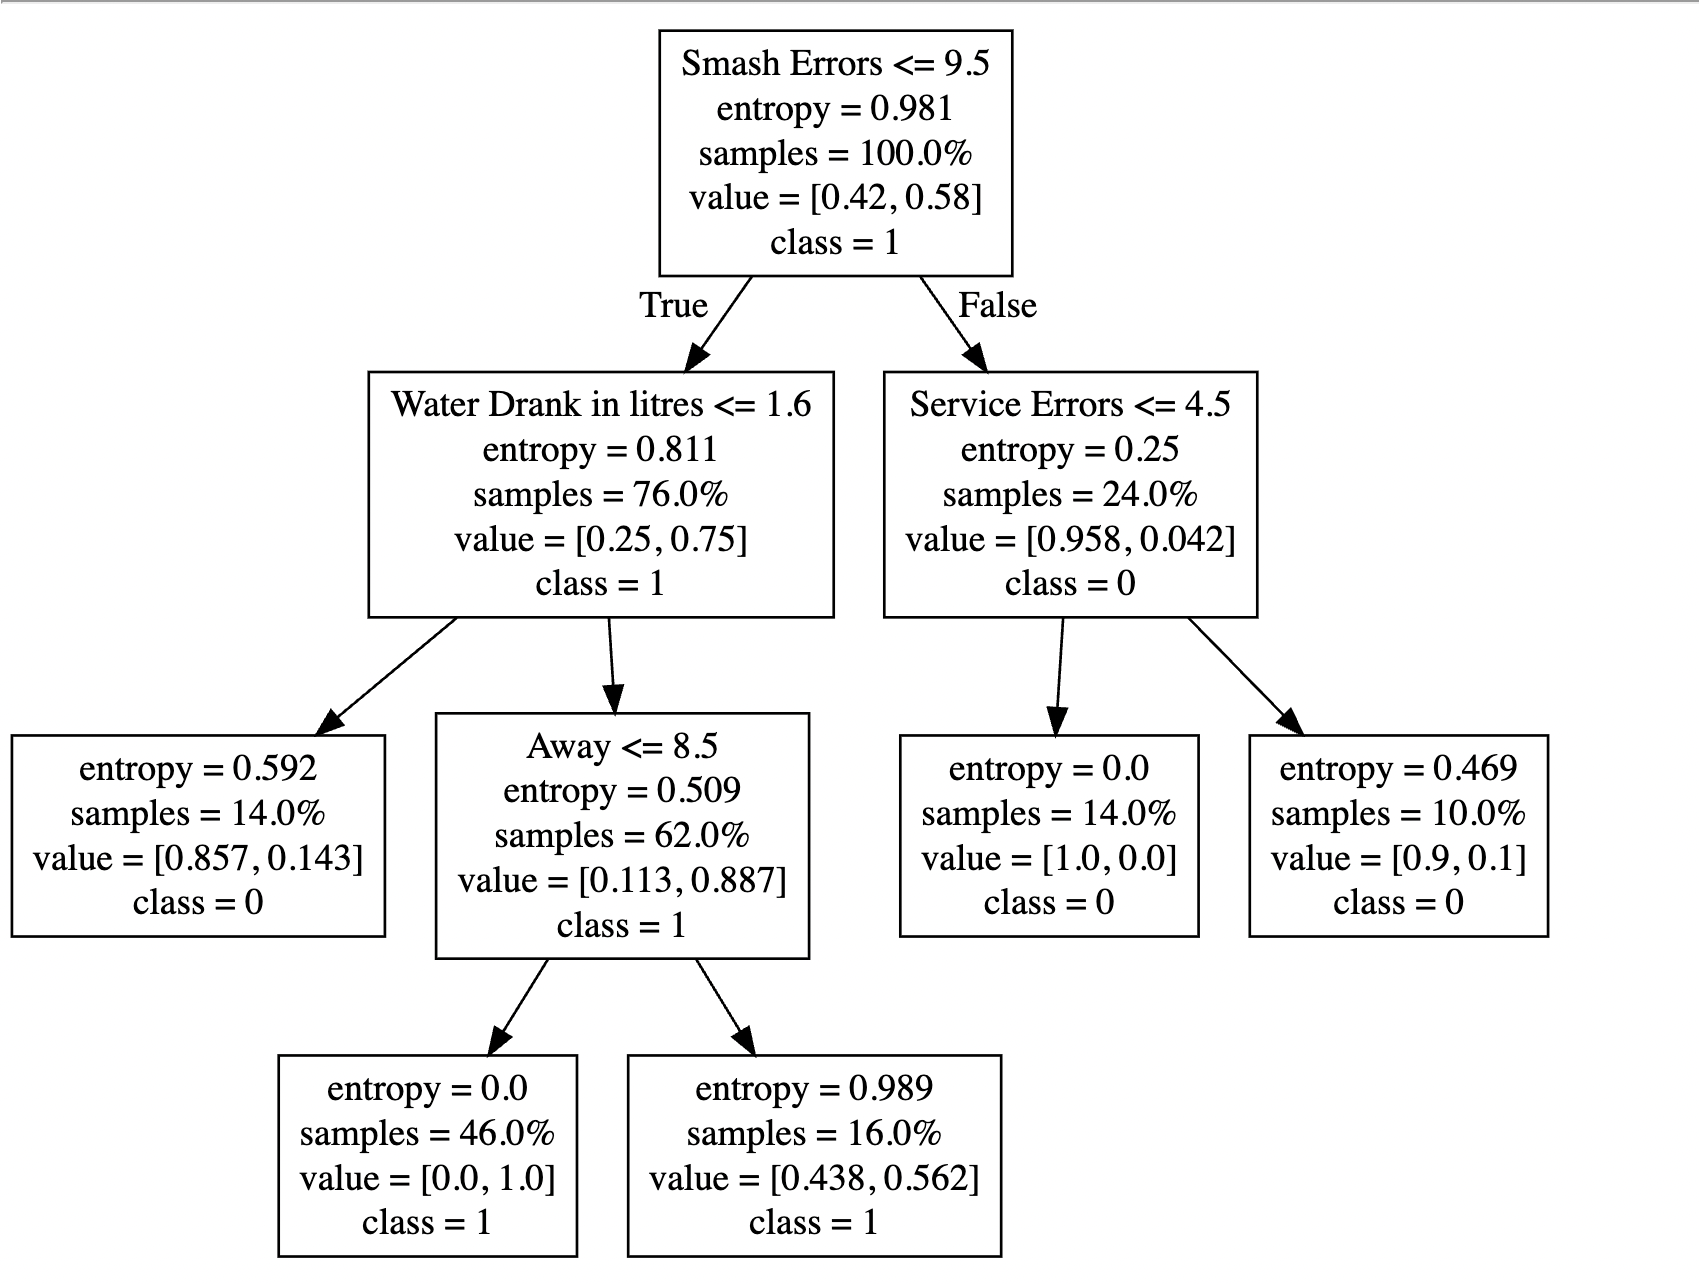

In [89]:
from IPython.display import Image
Image(filename='Decision Tree.png')

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf = RandomForestClassifier()

In [94]:
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model

param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [2,3,4,5,6,7],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }



In [95]:
# run randomized search
n_iter_search = 10
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',cv=5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70],
                                        'max_features': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 1000]},
                   scoring='roc_auc')

In [96]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       max_features=3, min_samples_leaf=2, min_samples_split=15,
                       n_estimators=500)

In [97]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.973 (std: 0.022)
Parameters: {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.967 (std: 0.029)
Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': 70, 'criterion': 'gini', 'class_weight': None, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.965 (std: 0.022)
Parameters: {'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.965 (std: 0.028)
Parameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 2, 'max_depth': 30, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}

Model with ran

In [98]:
# select the best values from results above, they will vary slightly with each run
rf=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                          max_features=3, min_samples_leaf=2, min_samples_split=15,
                          n_estimators=500)

In [99]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       max_features=3, min_samples_leaf=2, min_samples_split=15,
                       n_estimators=500)

# Feature Importance

In [100]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':rf.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
3,Smash Errors,0.403682
4,Water Drank in litres,0.279685
2,Away,0.183638
1,Net Errors,0.063800
0,Service Errors,0.028999
5,Meditated,0.026251
6,Diet_Light,0.007581
7,Diet_Moderate,0.006363


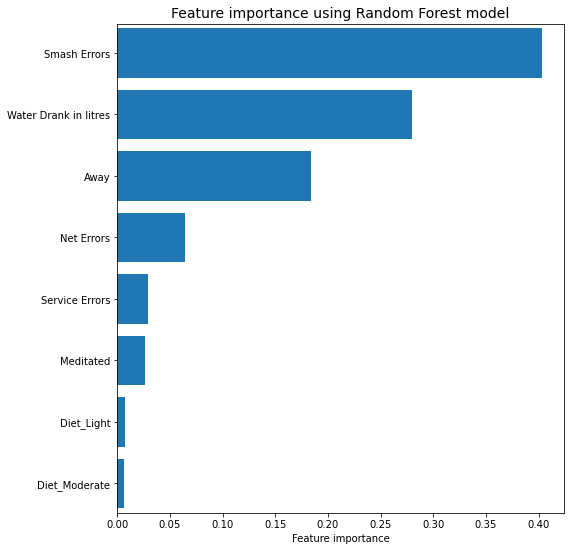

In [146]:
Ftrs_Imp = pd.DataFrame(rf.feature_importances_, columns=['importance'], index=x_train.columns)
Ftrs_Imp.sort_values('importance', inplace=True)
# Plotting feature importances
plt.figure(figsize=(8,9))
plt.barh(Ftrs_Imp.index, Ftrs_Imp.importance, align='center') 
plt.title("Feature importance using Random Forest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

The chances of me winning a badminton game is highly influenced on whether I'm hydrated or not,number of smash errors,net errors,aways

Note that feature importance using Random Forest only gives me the important features that affects the outcome

# Partial Dependence Plot

In [158]:
var_name='Smash Errors'

preds=rf.predict_proba(x_train)[:,1]
# part_dep_data

In [159]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

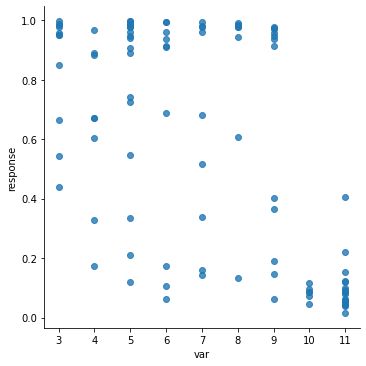

In [160]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [161]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

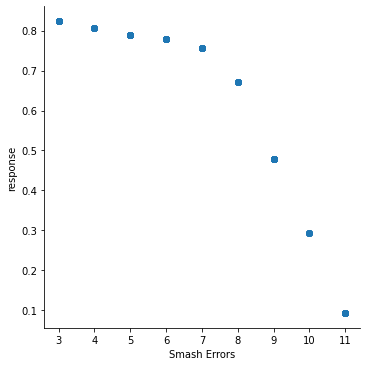

In [162]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

In [163]:
var_name='Away'

preds=rf.predict_proba(x_train)[:,1]
# part_dep_data

In [164]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

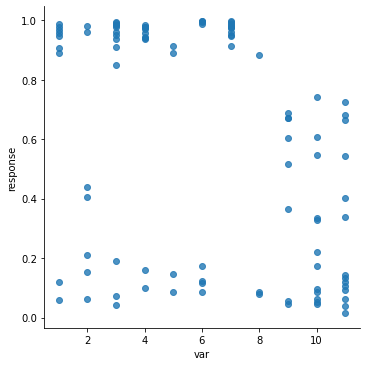

In [165]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [166]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

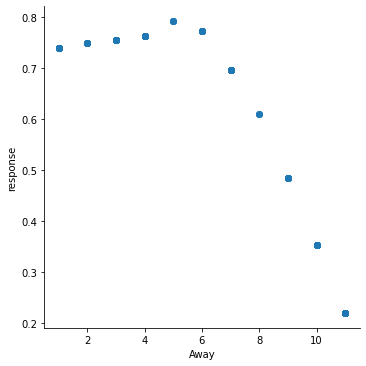

In [167]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)

In [168]:
var_name='Water Drank in litres'

preds=rf.predict_proba(x_train)[:,1]
# part_dep_data

In [169]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

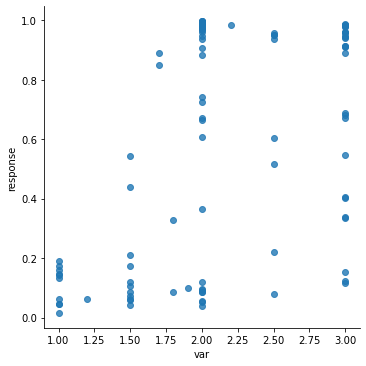

In [170]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [171]:
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])

# smooth_data

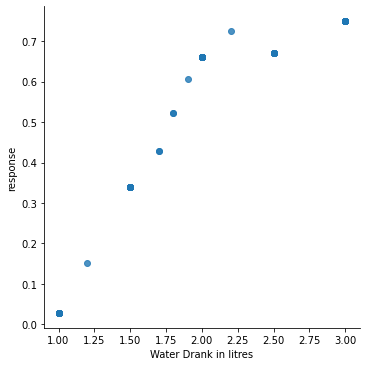

In [172]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)